# "В один клик". Персональные предложения для клиентов

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

## Задача 

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Детализация задачи

<ol>
    <li>Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».</li>
    <li>Нужно собрать данные по клиентам по следующим группам:
        <ul>
            <li>Признаки, которые описывают коммуникацию сотрудников компании с клиентом.</li>
            <li>Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.</li>
            <li>Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.</li>
            <li>Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.</li>
            <li>Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.</li>
            <img src='https://pictures.s3.yandex.net/resources/image_1695485033.png' width="600" height="600">
            </ul>
    </li>
    <li>Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.</li>
    <li>В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.</li>
    <li>Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.</li>
</ol>

### Описание данных
Данные для работы находятся в нескольких таблицах.

**market_file.csv** - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Покупательская активность* — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».<br>
*Тип сервиса* — уровень сервиса, например «премиум» и «стандарт».<br>
*Разрешить сообщать* — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.<br>
*Маркет_актив_6_мес* — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.<br>
*Маркет_актив_тек_мес* — количество маркетинговых коммуникаций в текущем месяце.<br>
*Длительность* — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.<br>
*Акционные_покупки* — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.<br>
*Популярная_категория* — самая популярная категория товаров у покупателя за последние 6 месяцев.<br>
*Средний_просмотр_категорий_за_визит* — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.<br>
*Неоплаченные_продукты_штук_квартал* — общее число неоплаченных товаров в корзине за последние 3 месяца.<br>
*Ошибка_сервиса* — число сбоев, которые коснулись покупателя во время посещения сайта.<br>
*Страниц_за_визит* — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>

**market_money.csv** - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Период* — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.<br>
*Выручка* — сумма выручки за период.<br>

**market_time.csv** - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Период* — название периода, во время которого зафиксировано общее время.<br>
минут — значение времени, проведённого на сайте, в минутах.<br>

**money.csv** - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
*id* — номер покупателя в корпоративной базе данных.<br>
*Прибыль* — значение прибыли.<br>

In [1]:
!pip install -q imblearn
!pip install -q phik
!pip install -Uq scikit-learn
!pip install -q shap
!pip install -q optuna
!pip install -q optuna.integration

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler, 
    OneHotEncoder, 
    OrdinalEncoder)
from sklearn.impute import SimpleImputer
from itertools import product
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

sns.set(rc={'figure.figsize':(20, 10)})

RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка данных

In [3]:
try:
    market = pd.read_csv('market_file.csv')
    market_money = pd.read_csv('market_money.csv')
    market_time = pd.read_csv('market_time.csv')
    money = pd.read_csv('money.csv', sep=';', decimal=',')
except FileNotFoundError:
    try:
        market = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
        market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
        market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
        money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')
    except Exception as e:
        print("Ошибка при загрузке данных с внешнего источника:", e)
        raise


In [4]:
def tidy_dataframe(df):
    """
    Универсальная функция для приведения датафрейма к единому стилю.

    • В названиях столбцов заменяет пробелы на «_» и переводит всё в нижний регистр.  
    • Во всех строковых столбцах делает то же самое со значениями.  
    • Отображает структуру, первые строки и число полных дублей.  
    • Возвращает очищенный датафрейм.
    """
    # --- стандартизация имён столбцов
    df.columns = [col.replace(' ', '_').lower() for col in df.columns]

    # --- стандартизация строковых значений
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace(' ', '_').str.lower()

    # --- информационный вывод
    display(df.info())
    print()
    display(df.head())
    print(f'Полных дублей: {df.duplicated().sum()}\n')

    return df

In [5]:
for df in [market, market_money, market_time, money]:
    df = tidy_dataframe(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


Полных дублей: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Полных дублей: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Полных дублей: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Полных дублей: 0



### Выводы по таблице `market`

- В таблице содержится информация о 1300 клиентах интернет-магазина.
- Пропущенных значений в данных нет — все столбцы полностью заполнены.
- Целевой признак — `покупательская_активность`, принимает два значения: `снизилась` и `прежний_уровень`.
- Признаки охватывают четыре аспекта поведения клиента:
  - **Коммуникации**: `разрешить_сообщать`, `маркет_актив_6_мес`, `маркет_актив_тек_мес`.
  - **Продуктовое поведение**: `акционные_покупки`, `популярная_категория`.
  - **Финансовое поведение**: отражено косвенно (через активность и длительность), но напрямую пока не выражено.
  - **Поведение на сайте**: `длительность`, `средний_просмотр_категорий_за_визит`, `неоплаченные_продукты_штук_квартал`, `ошибка_сервиса`, `страниц_за_визит`.

- Некоторые наблюдения из первых строк:
  - Клиенты, у которых активность снизилась, могут как использовать премиум-сервис, так и стандартный — тип сервиса не определяет целевой признак однозначно.
  - Часто встречается высокая доля акционных покупок, особенно у клиентов со стандартным обслуживанием.
  - Популярной категорией у большинства клиентов являются `товары_для_детей`, что может быть значимым фактором в анализе.

- Предобработка уже проведена:
  - Все текстовые значения приведены к нижнему регистру.
  - Пробелы заменены на подчёркивания.
  - Типы данных корректны: количественные признаки в `int64` и `float64`, категориальные — в `object`.

Эти данные являются качественной основой для дальнейшего моделирования и сегментации клиентов.


### Выводы по таблице `market_money`

- В таблице содержится информация о 3900 записях по выручке от клиентов за разные периоды.
- Пропущенных значений в данных нет — все столбцы полностью заполнены.
- Таблица отражает **финансовое поведение клиентов** во времени: данные сгруппированы по идентификатору клиента и периоду наблюдения.

- Структура признаков:
  - `id`: идентификатор клиента.
  - `период`: временной интервал, за который зафиксирована выручка (`текущий_месяц`, `предыдущий_месяц`, `предпредыдущий_месяц`).
  - `выручка`: сумма покупок клиента за указанный период.

- Некоторые наблюдения из первых строк:
  - Для одного клиента присутствуют несколько записей, соответствующих разным периодам — это позволяет отслеживать динамику изменений.
  - В выборке встречаются случаи нулевой выручки за отдельные месяцы, что может сигнализировать о временном снижении активности.
  - Значения выручки могут значительно варьироваться между месяцами для одного и того же клиента.

- Предобработка уже проведена:
  - Столбцы приведены к нижнему регистру.
  - Пробелы заменены на подчёркивания.
  - Типы данных соответствуют логике признаков: `int64` для идентификатора, `object` для периода, `float64` для выручки.

Эти данные пригодны для агрегирования и расчёта трендов активности клиента, а также для последующей интеграции в модель предсказания оттока.


### Выводы по таблице `market_time`

- В таблице содержится информация о 2600 записях, отражающих время, проведённое клиентами на сайте.
- Пропущенных значений нет — все строки заполнены.
- Таблица фиксирует **поведение пользователей на сайте** в разрезе времени за разные месяцы.

- Структура признаков:
  - `id`: идентификатор клиента.
  - `период`: временной интервал (`текущий_месяц`, `предыдущий_месяц`).
  - `минут`: общее количество минут, проведённых на сайте за указанный период.

- Некоторые наблюдения из первых строк:
  - Для одного клиента может быть несколько записей, соответствующих разным периодам.
  - Время, проведённое на сайте, варьируется умеренно: например, у клиента с `id = 215348` — 14 минут в текущем месяце и 13 минут в предыдущем.
  - Эти данные могут использоваться для оценки вовлечённости клиента и выявления её динамики.

- Предобработка уже выполнена:
  - Названия столбцов приведены к единому формату.
  - Типы данных соответствуют содержимому: `int64` для числовых значений, `object` — для периодов.

Эта таблица является источником важного поведенческого признака — времени взаимодействия с сайтом, и может быть полезна при построении модели снижения активности.


### Выводы по таблице `money`

- В таблице содержится информация о 1300 клиентах.
- Пропущенных значений нет — все строки полностью заполнены.
- Таблица отражает **среднемесячную прибыль**, которую приносит каждый клиент за последние 3 месяца.

- Структура признаков:
  - `id`: идентификатор клиента.
  - `прибыль`: значение средней прибыли, которую клиент обеспечил магазину (тип `float64`).

- Некоторые наблюдения из первых строк:
  - Значения прибыли варьируются в широком диапазоне: от менее 1 до более 4.
  - Распределение прибыли по клиентам может быть полезно для последующей сегментации — например, выделения высоко- и низкоприбыльных групп.
  - Таблица содержит по одному значению прибыли на клиента — агрегация уже выполнена.

- Предобработка уже проведена:
  - Названия столбцов приведены к единому стилю.
  - Типы данных корректны: `int64` для идентификатора, `float64` — для прибыли.
  - Полных дубликатов нет.

Эти данные могут быть объединены с модельными предсказаниями, чтобы выделить стратегически важных клиентов для персонализированных предложений.


In [6]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market['тип_сервиса'] = market['тип_сервиса'].replace('стандартт', 'стандарт')


### Выводы по исправлению ошибок в данных

В исходных таблицах были обнаружены орфографические ошибки в категориальных признаках. Для обеспечения корректной агрегации и обучения моделей были внесены следующие исправления:

- В таблице `market_money`:
  - Заменено значение `препредыдущий_месяц` на корректное `предпредыдущий_месяц` в столбце `период`.

- В таблице `market_time`:
  - Исправлена опечатка `предыдцщий_месяц` на `предыдущий_месяц` в столбце `период`.

- В таблице `market`:
  - Удален неявный дубль `стандартт`.

Эти корректировки устранили потенциальные ошибки в группировках и кодировании категориальных признаков, а также обеспечили единообразие значений для последующего анализа и построения моделей.


## Исследовательский анализ данных

### market

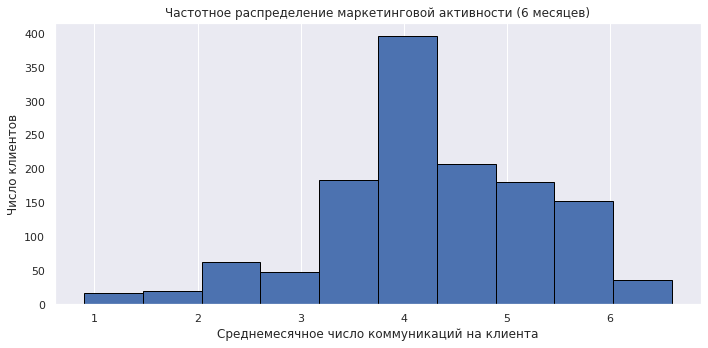

In [7]:
plt.figure(figsize=(10, 5))
market['маркет_актив_6_мес'].hist(bins=10, edgecolor='black')
plt.title('Частотное распределение маркетинговой активности (6 месяцев)')
plt.xlabel('Среднемесячное число коммуникаций на клиента')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению маркетинговой активности за 6 месяцев

- Распределение маркетинговой активности за последние полгода имеет форму, близкую к нормальной, с умеренной асимметрией в сторону меньших значений.
- Наибольшее число клиентов (около 400) получали в среднем по 4 маркетинговые коммуникации в месяц.
- Большинство наблюдений сосредоточено в диапазоне от 3 до 5 сообщений — это основной операционный диапазон работы маркетинговой системы.
- Небольшое количество клиентов получали менее 2 или более 6 коммуникаций в месяц — это крайние значения, которые могут быть связаны с индивидуальной стратегией взаимодействия или ошибками в данных.
- Полученное распределение можно использовать как основу для построения категориального признака интенсивности маркетинговой активности.


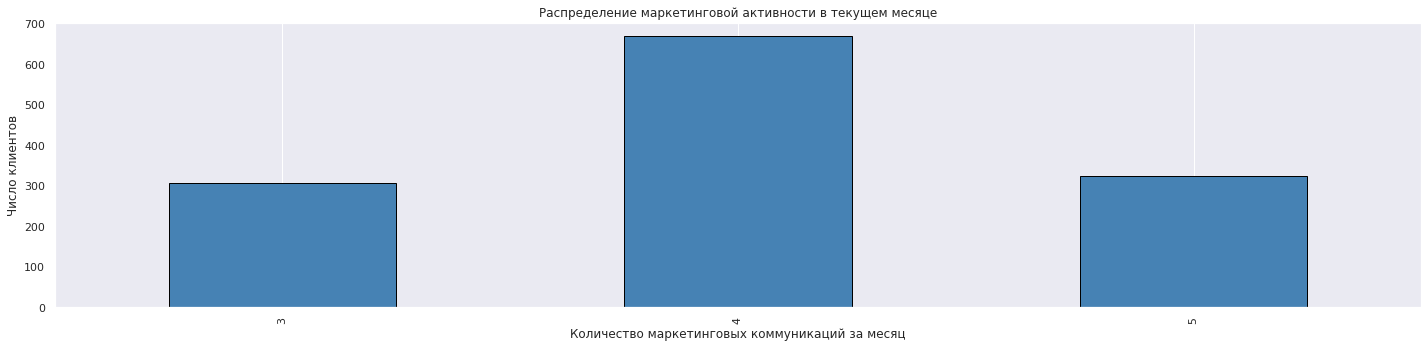

In [8]:
plt.figure(figsize=(20, 5))
market['маркет_актив_тек_мес'].value_counts().sort_index().plot.bar(color='steelblue', edgecolor='black')

plt.title('Распределение маркетинговой активности в текущем месяце')
plt.xlabel('Количество маркетинговых коммуникаций за месяц')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению маркетинговой активности в текущем месяце

- Наиболее часто клиенты получали 4 маркетинговые коммуникации в течение текущего месяца — таких клиентов 690.
- По 3 и 5 коммуникаций получили по 305 клиентов соответственно.
- Распределение имеет форму, близкую к симметричной, с отчётливо выраженным пиком на значении 4.
- Число маркетинговых касаний в месяц варьируется в диапазоне от 3 до 5. Клиенты вне этого диапазона в данных отсутствуют.
- Такая структура распределения указывает на стандартизированный подход к количеству взаимодействий с клиентами со стороны маркетинга.


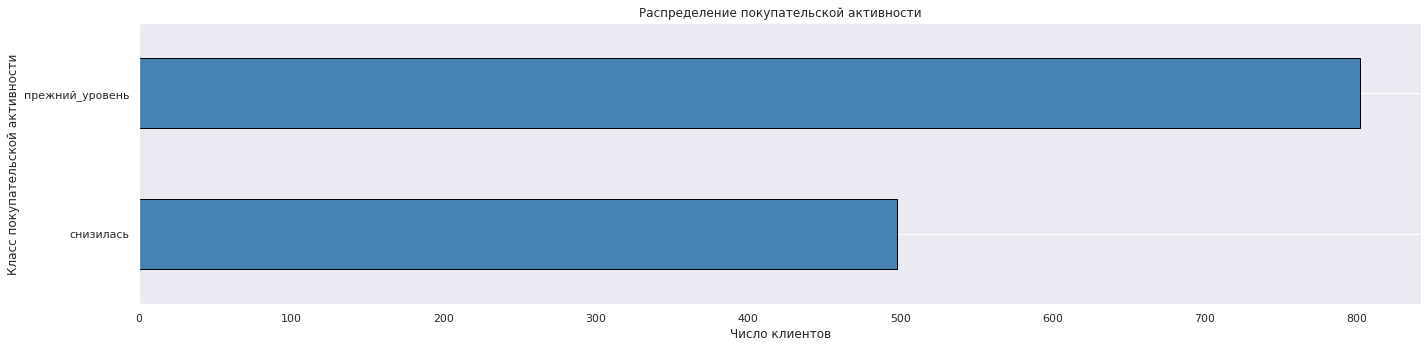

In [9]:
plt.figure(figsize=(20, 5))
market['покупательская_активность']\
    .value_counts().sort_values().plot.barh(color='steelblue', edgecolor='black')

plt.title('Распределение покупательской активности')
plt.xlabel('Число клиентов')
plt.ylabel('Класс покупательской активности')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению покупательской активности

- В выборке присутствуют два класса покупательского поведения: `снизилась` и `прежний_уровень`.
- Количество клиентов с прежним уровнем активности — 818.
- Количество клиентов, у которых активность снизилась — 482.
- Распределение между классами несбалансированное: доля сниженной активности составляет 37%, в то время как прежний уровень — 63%.
- Преобладание одного класса может потребовать дополнительных шагов при обучении модели: например, использование стратифицированной выборки или методов балансировки.


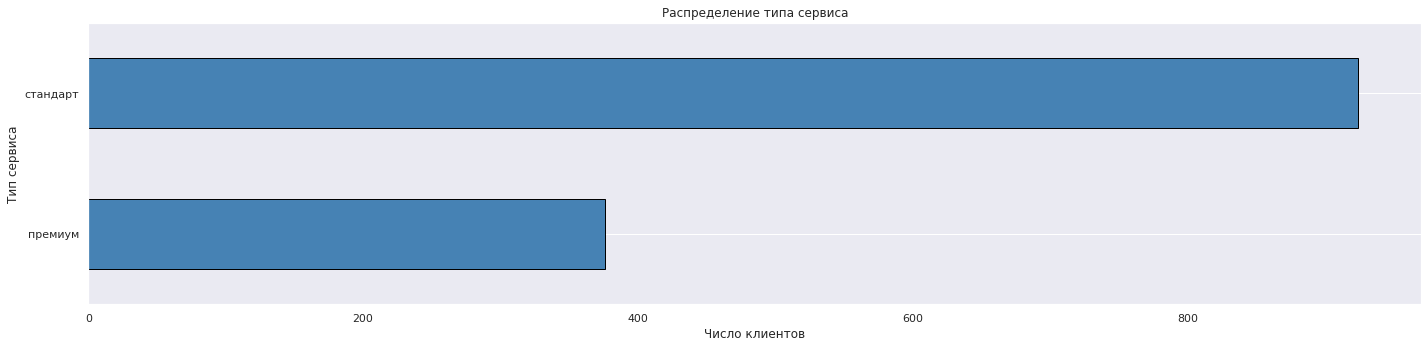

In [10]:
plt.figure(figsize=(20, 5))
market['тип_сервиса']\
    .value_counts().sort_values().plot.barh(color='steelblue', edgecolor='black')

plt.title('Распределение типа сервиса')
plt.xlabel('Число клиентов')
plt.ylabel('Тип сервиса')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению типа сервиса

- В данных представлены два типа клиентского обслуживания: `премиум` и `стандарт`.
- Количество клиентов с типом сервиса `премиум` — 376.
- Количество клиентов с типом сервиса `стандарт` — 924.
- Большинство клиентов обслуживаются по стандартной схеме, что составляет 71% от выборки.
- Премиальный сегмент составляет 29% и может рассматриваться отдельно при разработке персонализированных стратегий.
- Такое соотношение важно учитывать при анализе клиентского поведения и построении моделей, если тип сервиса используется как признак.


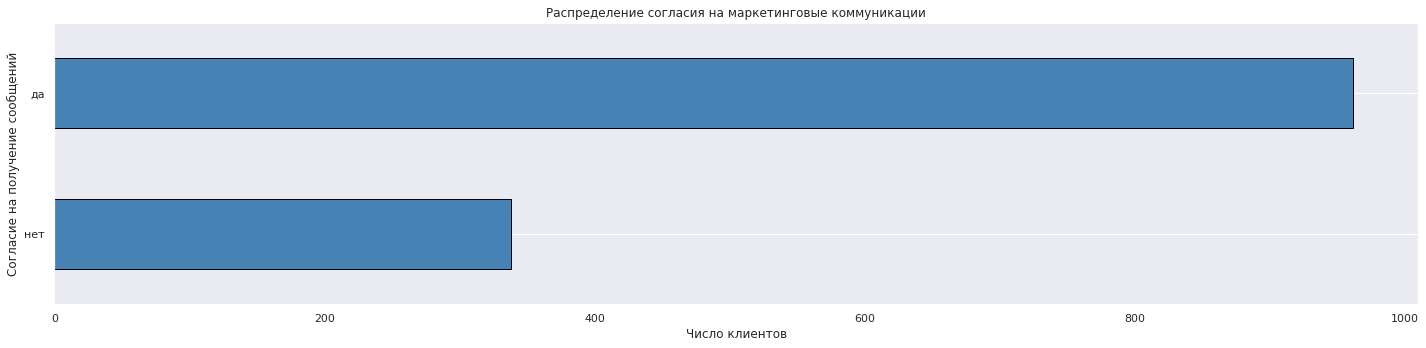

In [11]:
plt.figure(figsize=(20, 5))
market['разрешить_сообщать']\
    .value_counts().sort_values().plot.barh(color='steelblue', edgecolor='black')

plt.title('Распределение согласия на маркетинговые коммуникации')
plt.xlabel('Число клиентов')
plt.ylabel('Согласие на получение сообщений')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению согласия на маркетинговые коммуникации

- В таблице зафиксировано два возможных значения: `да` и `нет`.
- Число клиентов, давших согласие на получение сообщений — 951.
- Число клиентов, отказавшихся от коммуникаций — 349.
- 73% клиентов готовы получать маркетинговые сообщения, тогда как 27% — нет.
- Полученное распределение демонстрирует высокую степень вовлечённости и открытости клиентов к взаимодействию с магазином.
- Признак может быть полезен для фильтрации аудитории при построении персонализированных предложений.


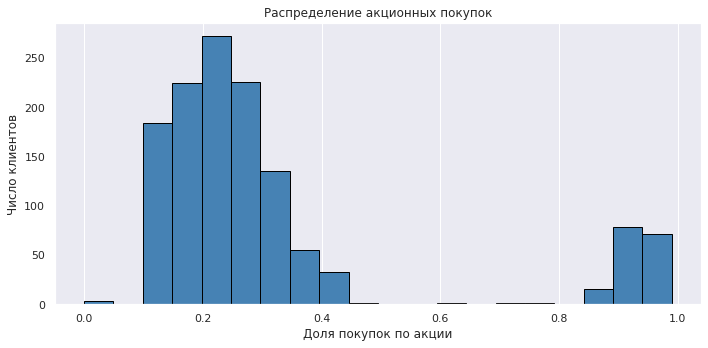

In [12]:
plt.figure(figsize=(10, 5))
market['акционные_покупки'].hist(bins=20, edgecolor='black', color='steelblue')

plt.title('Распределение акционных покупок')
plt.xlabel('Доля покупок по акции')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению акционных покупок

- Распределение доли покупок по акции асимметрично и смещено влево.
- Основная масса клиентов  совершает от 10% до 30% своих покупок по акции.
- Наблюдается отдельный кластер клиентов, у которых доля акционных покупок превышает 90%.
- Минимальные значения доли — около 0, максимальные — вплоть до 1.
- Такая структура указывает на наличие разных стратегий покупательского поведения:
  - одни клиенты преимущественно покупают товары со скидками,
  - другие — в основном по полной стоимости.
- Признак может быть полезен для сегментации клиентов по чувствительности к акциям и разработке целевых предложений.


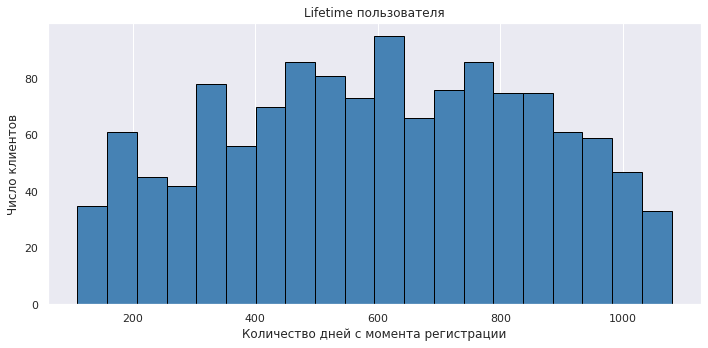

In [13]:
plt.figure(figsize=(10, 5))
market['длительность'].hist(bins=20, edgecolor='black', color='steelblue')

plt.title('Lifetime пользователя')
plt.xlabel('Количество дней с момента регистрации')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению срока с момента регистрации (длительности)

- Признак `длительность` отражает количество дней, прошедших с момента регистрации клиента на сайте.
- Распределение данных равномерное, без выраженных выбросов и провалов.
- Наиболее многочисленные группы клиентов зарегистрированы от 500 до 800 дней назад.
- Распределение демонстрирует, что в выборке преобладают клиенты с устойчивой историей взаимодействия с платформой.
- Признак `длительность` может использоваться для оценки зрелости клиента и коррелировать с устойчивостью покупательского поведения.


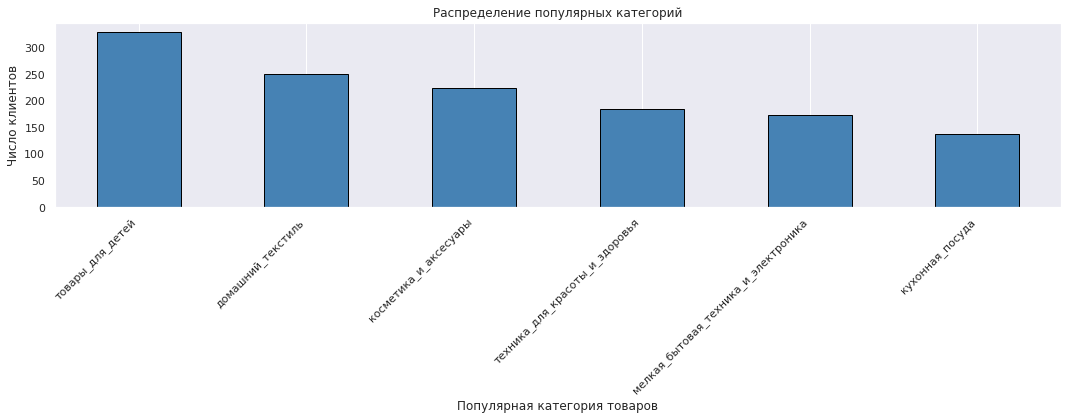

In [14]:
plt.figure(figsize=(15, 6))
market['популярная_категория']\
    .value_counts().sort_values(ascending=False).plot.bar(color='steelblue', edgecolor='black')

plt.title('Распределение популярных категорий')
plt.xlabel('Популярная категория товаров')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Вывод по распределению популярных товарных категорий

- Наиболее популярная категория среди клиентов — `товары_для_детей`, её предпочитают более 300 пользователей.
- Второе и третье места занимают `домашний_текстиль` и `косметика_и_аксессуары`, с числом клиентов около 250 и 220 соответственно.
- Менее популярными категориями являются `техника_для_красоты_и_здоровья`, `мелкая_бытовая_техника_и_электроника` и `кухонная_посуда`.
- Распределение показывает наличие выраженного спроса на детские и бытовые категории, что может быть учтено при формировании персонализированных предложений и товарных рекомендаций.
- Признак `популярная_категория` может быть важен при сегментации клиентов по товарным предпочтениям.


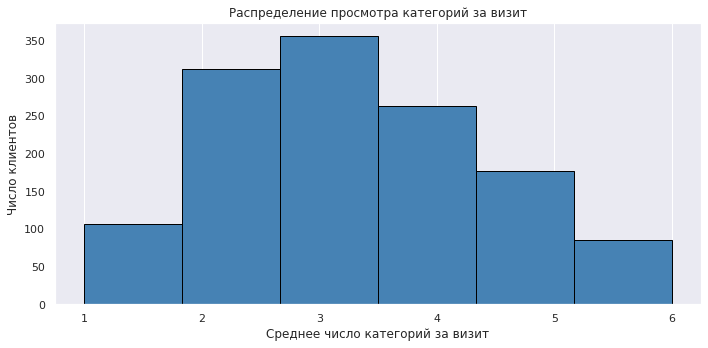

In [15]:
plt.figure(figsize=(10, 5))
market['средний_просмотр_категорий_за_визит'].hist(bins=6, edgecolor='black', color='steelblue')

plt.title('Распределение просмотра категорий за визит')
plt.xlabel('Среднее число категорий за визит')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению среднего количества просмотренных категорий за визит

- Большинство клиентов просматривают в среднем от 2 до 4 товарных категорий за один визит.
- Пик распределения приходится на значение 3 категории — таких клиентов более 350.
- Значения распределены в диапазоне от 1 до 6 категорий.
- Признак демонстрирует умеренную активность пользователей в рамках одного сеанса и может отражать интерес к ассортименту магазина.
- Данный показатель может быть полезен при оценке глубины вовлечённости и сегментации по интенсивности взаимодействия с сайтом.


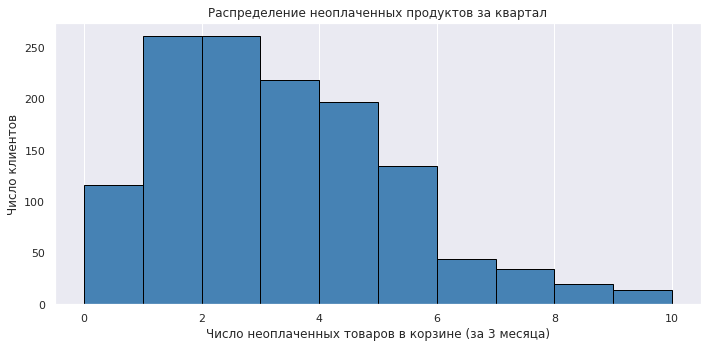

In [16]:
plt.figure(figsize=(10, 5))
market['неоплаченные_продукты_штук_квартал'].hist(bins=10, edgecolor='black', color='steelblue')

plt.title('Распределение неоплаченных продуктов за квартал')
plt.xlabel('Число неоплаченных товаров в корзине (за 3 месяца)')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению количества неоплаченных товаров за квартал

- Большинство клиентов оставляли в корзине от 1 до 3 неоплаченных товаров в течение последних трёх месяцев.
- Наиболее частотные значения — 1 и 2 позиции, каждый из которых зафиксирован у более чем 250 клиентов.
- Распределение убывает по мере роста числа неоплаченных позиций, что свидетельствует о снижении частоты подобных случаев при увеличении объёма брошенной корзины.
- Максимальные значения достигают 10 товаров, но такие случаи встречаются редко.
- Признак может быть важен при определении уровня заинтересованности клиента, а также сигнализировать о возможных технических или поведенческих причинах отказа от покупки.


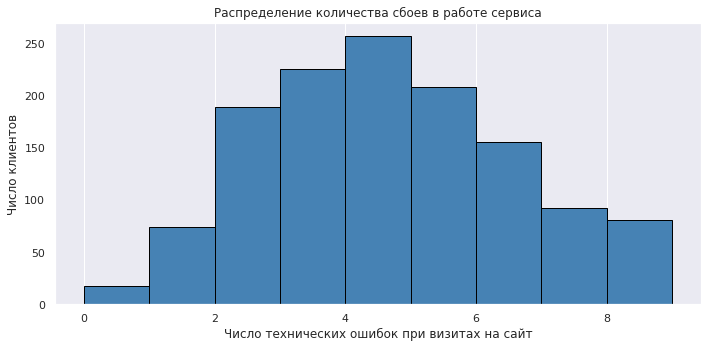

In [17]:
plt.figure(figsize=(10, 5))
market['ошибка_сервиса'].hist(bins=9, edgecolor='black', color='steelblue')

plt.title('Распределение количества сбоев в работе сервиса')
plt.xlabel('Число технических ошибок при визитах на сайт')
plt.ylabel('Число клиентов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению количества ошибок сервиса

- Признак `ошибка_сервиса` показывает количество технических сбоев, зарегистрированных у каждого клиента.
- Распределение симметрично и напоминает нормальное: большинство клиентов столкнулись с 3–5 ошибками.
- Максимальное зафиксированное число сбоев — 9, минимальное — 0.
- Небольшая доля клиентов (менее 50) не столкнулась с ошибками вовсе.
- Более 80% клиентов испытали от 2 до 6 сбоев, что указывает на широкое распространение технических проблем на платформе.
- Признак может оказать влияние на уровень покупательской активности и лояльность клиента, поэтому его стоит учитывать при построении модели и разработке рекомендаций.


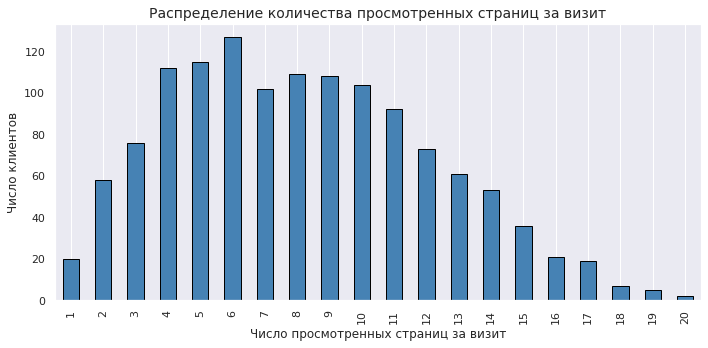

In [18]:
plt.figure(figsize=(10, 5))

# Группируем по уникальным целым значениям
market['страниц_за_визит'].value_counts().sort_index().plot.bar(
    color='steelblue', edgecolor='black')

plt.title('Распределение количества просмотренных страниц за визит', fontsize=14)
plt.xlabel('Число просмотренных страниц за визит', fontsize=12)
plt.ylabel('Число клиентов', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Вывод по распределению количества просмотренных страниц за визит

- Большинство клиентов просматривают от 5 до 10 страниц за один визит.
- Распределение правосторонне асимметрично — с постепенным спадом к большим значениям.
- Наиболее часто встречающееся значение — 6 страниц.
- Максимальное зафиксированное значение — 20 страниц за визит, но такие случаи редки.
- Меньше всего клиентов просматривают 1–2 страницы.
- Показатель может служить индикатором вовлечённости: чем больше просмотренных страниц, тем выше интерес клиента к товарному ассортименту.


### Общий вывод по данным `market`

Анализ таблицы `market`, содержащей поведенческие и коммуникационные признаки клиентов интернет-магазина, позволил выявить следующие ключевые особенности:

### 1. Структура клиентской базы
- В выборке представлено 1300 клиентов.
- Целевая переменная `покупательская_активность` сбалансирована: 63 % клиентов сохранили активность, 37 % — снизили её.
- Большинство клиентов обслуживаются по стандартному тарифу (71 %), 29 % — в премиум-сегменте.

### 2. Маркетинговые коммуникации
- Среднемесячное число маркетинговых коммуникаций за последние полгода распределено нормально с модой на уровне 4.
- В текущем месяце активность делится строго на три категории: 3, 4 и 5 коммуникаций, где большинство клиентов (690) получают 4.
- 73 % клиентов дали согласие на получение маркетинговых сообщений.

### 3. Поведенческие характеристики
- Преобладающая доля акционных покупок — 10–30 % от всех покупок. Есть небольшой сегмент пользователей, делающих почти все покупки по акциям.
- Средний `lifetime` (количество дней с момента регистрации) — 500–800 дней. Клиенты, зарегистрированные менее 150 или более 1000 дней назад, встречаются реже.
- Популярные категории товаров: `товары_для_детей`, `домашний_текстиль` и `косметика_и_аксессуары`.
- Большинство клиентов просматривают 2–4 товарных категории за визит и 5–10 страниц.
- У 75 % клиентов в корзине находится до 4 неоплаченных товаров.
- Количество технических сбоев, зафиксированных по клиенту, чаще всего составляет 3–5.

### 4. Практическое значение
- Признаки хорошо описывают поведение клиентов в разных аспектах: от интереса к продуктам до взаимодействия с сервисом.
- Для построения прогностических моделей полезными могут быть следующие группы признаков:
  - **Коммуникации**: объём и регулярность рассылок, согласие на сообщения.
  - **Покупательское поведение**: доля акционных покупок, количество неоплаченных товаров.
  - **Сайт-активность**: глубина просмотра страниц и категорий, количество ошибок сервиса.
- Обнаружены сегменты, требующие отдельного подхода:
  - Пользователи с высокой долей акционных покупок.
  - Клиенты, регулярно сталкивающиеся с ошибками.
  - Группа с брошенными корзинами.

---


### market_money

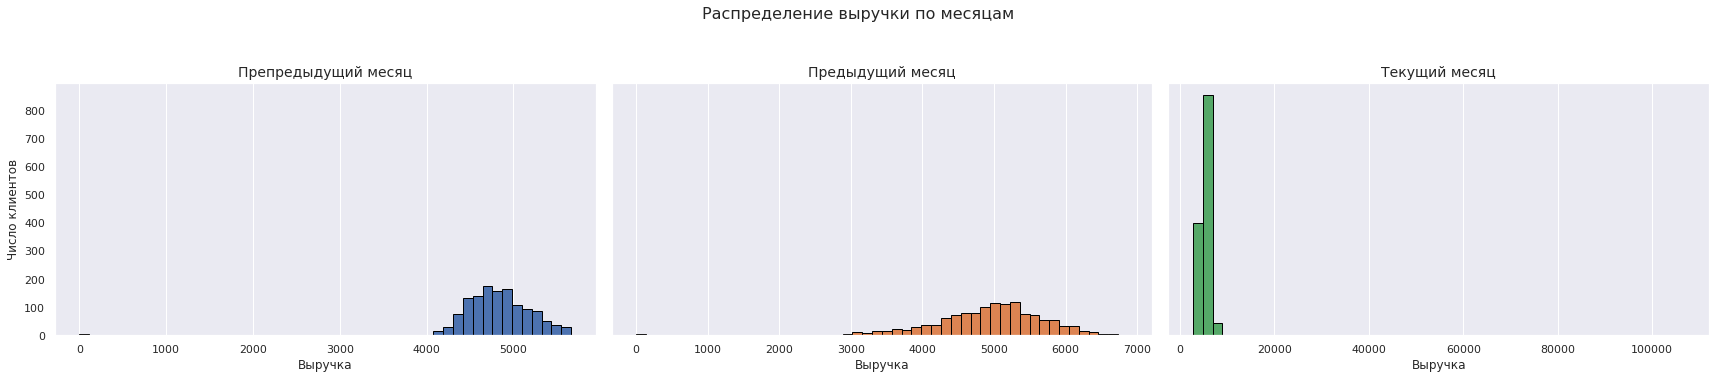

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=True)
fig.suptitle('Распределение выручки по месяцам', fontsize=16, y=1.05)

# Параметры для каждого периода
periods = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
colors = ['#4c72b0', '#dd8452', '#55a868']

for ax, period, color in zip(axes, periods, colors):
    data = market_money.query(f'период == "{period}"')['выручка']
    ax.hist(data, bins=50, color=color, edgecolor='black')
    ax.set_title(period.replace('_', ' ').capitalize(), fontsize=14)
    ax.set_xlabel('Выручка')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylabel('Число клиентов')
plt.tight_layout()
plt.show()


### Выводы по распределению выручки по месяцам

- Для каждого месяца построены отдельные гистограммы, ось Y унифицирована.
- **Препредыдущий месяц**:
  - Распределение плотное, значения выручки находятся преимущественно в пределах от 4300 до 5100.
  - Явных выбросов не наблюдается.
- **Предыдущий месяц**:
  - Распределение смещено в сторону более высоких значений, по сравнению с предыдущим периодом.
  - Основной диапазон — от 4500 до 5700.
- **Текущий месяц**:
  - Распределение резко отличается: у большинства клиентов выручка составляет менее 2000, при этом присутствуют значительные выбросы выше 20000 и до 100000.
  - Наблюдается сильная положительная асимметрия и выраженные аномалии.

### Общий вывод

В текущем месяце структура выручки изменилась — большая часть клиентов имеет существенно меньшие значения, чем в предыдущих периодах. При этом в данных зафиксированы редкие, но высокие выбросы. Это может свидетельствовать о существенных изменениях в пользовательском поведении или структуре заказов.


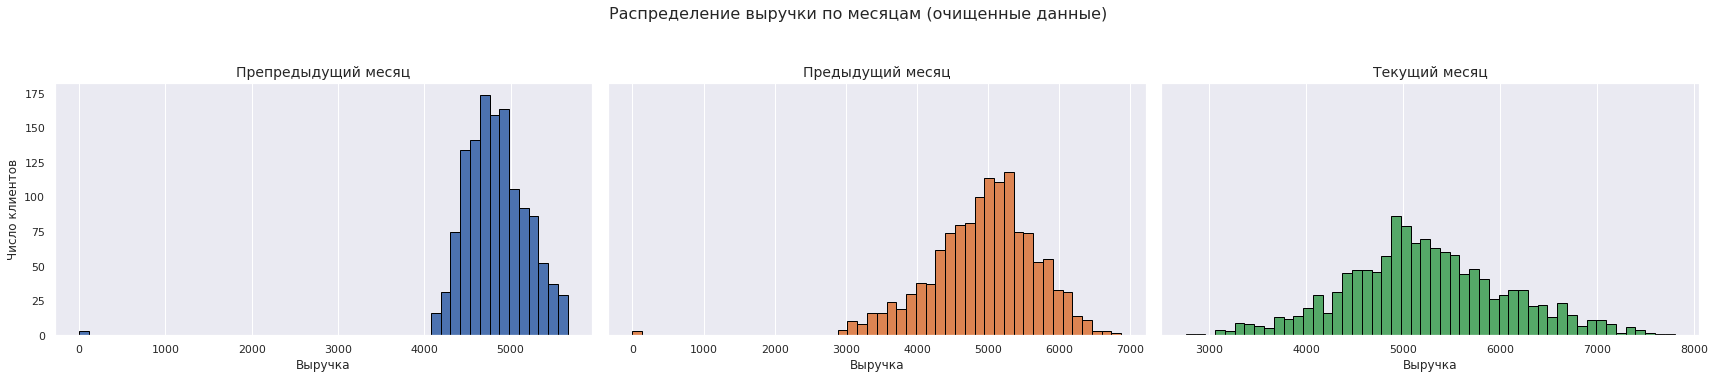

In [20]:
# 1. Отбираем только тех клиентов, у кого суммарная выручка > 0
valid_ids = (
    market_money
    .groupby('id')['выручка']
    .sum()
    .loc[lambda x: x > 0]
    .index
)

# 2. Удаляем клиента с выручкой > 10_000 в текущем месяце
bad_ids = market_money.query('период == "текущий_месяц" and выручка > 10000')['id'].unique()

# 3. Получаем итоговый срез
market_money = market_money[
    market_money['id'].isin(valid_ids) &
    ~market_money['id'].isin(bad_ids)
].copy()

fig, axes = plt.subplots(1, 3, figsize=(24, 5), sharey=True)
fig.suptitle('Распределение выручки по месяцам (очищенные данные)', fontsize=16, y=1.05)

# Параметры для каждого периода
periods = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
colors = ['#4c72b0', '#dd8452', '#55a868']

for ax, period, color in zip(axes, periods, colors):
    data = market_money.query(f'период == "{period}"')['выручка']
    ax.hist(data, bins=50, color=color, edgecolor='black')
    ax.set_title(period.replace('_', ' ').capitalize(), fontsize=14)
    ax.set_xlabel('Выручка')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

axes[0].set_ylabel('Число клиентов')
plt.tight_layout()
plt.show()




### Распределение выручки по месяцам (без выбросов)

- **Препредыдущий месяц**  
  Распределение выручки компактное и симметричное.  
  Основная масса значений сосредоточена в интервале **4500–5200**.  
  Наблюдается выраженный пик — концентрация клиентов с близким уровнем выручки.

- **Предыдущий месяц**  
  Распределение стало шире, смещено вправо по сравнению с препредыдущим периодом.  
  Значения выручки варьируются в пределах **3500–6500**, пик сместился ближе к **5000**.  
  Увеличилась дисперсия, появились более высокие значения.

- **Текущий месяц**  
  После удаления выбросов (>10 000) распределение выручки приблизилось к нормальному.  
  Основной диапазон значений — **3500–7500**, пик — около **5000**.  
  Распределение стало ближе по форме к предыдущему месяцу, но всё ещё более растянуто.

**Общий вывод:**  
Выручка растёт от месяца к месяцу, при этом увеличивается и разброс значений.  
После удаления аномалий в текущем месяце тенденция к росту сохраняется, но становится лучше читаемой.


### market_time


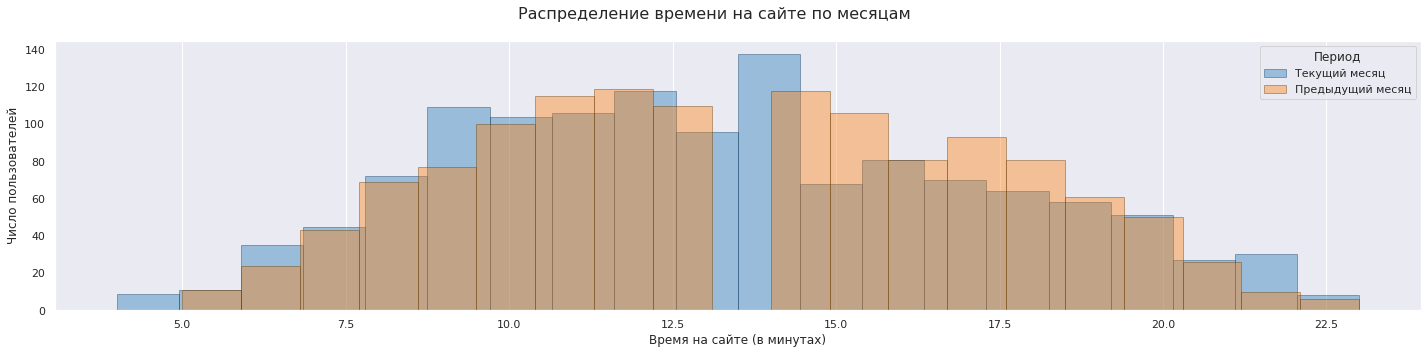

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Распределение времени на сайте по месяцам', fontsize=16)

# Цвета и стили
colors = {'текущий_месяц': '#1f77b4', 'предыдущий_месяц': '#ff7f0e'}
edgecolors = {'текущий_месяц': '#0d3a5f', 'предыдущий_месяц': '#663900'}

# Гистограмма для текущего месяца
current = market_time.query('период == "текущий_месяц"')['минут']
ax.hist(current, bins=20, alpha=0.4, color=colors['текущий_месяц'], edgecolor=edgecolors['текущий_месяц'], label='Текущий месяц')

# Гистограмма для предыдущего месяца
previous = market_time.query('период == "предыдущий_месяц"')['минут']
ax.hist(previous, bins=20, alpha=0.4, color=colors['предыдущий_месяц'], edgecolor=edgecolors['предыдущий_месяц'], label='Предыдущий месяц')

# Настройки осей и легенды
ax.set_xlabel('Время на сайте (в минутах)', fontsize=12)
ax.set_ylabel('Число пользователей', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend(title='Период')
plt.tight_layout()
plt.show()


### Вывод по распределению времени на сайте (`market_time`)

- В анализ включены два периода: **текущий месяц** и **предыдущий месяц**.
- Распределения времени проведённого на сайте похожи и имеют нормальную форму.
- Основная часть пользователей проводит на сайте **от 8 до 18 минут**.
- В **текущем месяце** наблюдается небольшое смещение в сторону бóльших значений: больше клиентов проводят на сайте **13–15 минут** по сравнению с предыдущим.
- Значения **менее 6 минут** и **более 20 минут** встречаются реже.
- Распределения демонстрируют устойчивость пользовательского поведения между периодами, без резких изменений.


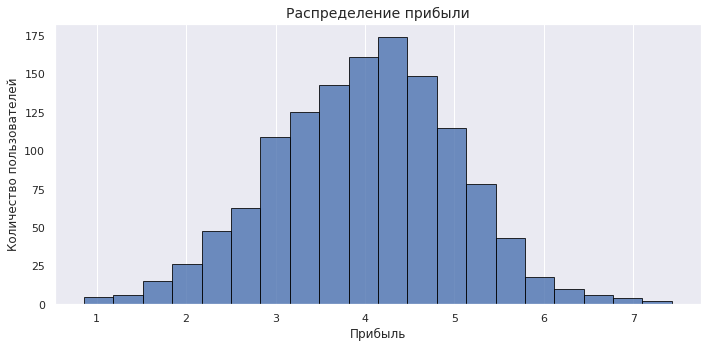

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(money['прибыль'], bins=20, color='#4c72b0', edgecolor='black', alpha=0.8)
plt.title('Распределение прибыли', fontsize=14)
plt.xlabel('Прибыль', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Несоответствие единиц измерения выручки и прибыли

- **Выручка** в датасете `market_money` представлена в абсолютных значениях,  в **рублях**. Это следует из масштаба данных: значения варьируются от нескольких тысяч до десятков тысяч, а в некоторых случаях достигают **100 000+**.

- **Прибыль** в датасете `money` имеет диапазон примерно от **1 до 7**, что **не соответствует масштабу выручки**. Это указывает на то, что прибыль, скорее всего, выражена **в относительных единицах** — например, в виде **коэффициента рентабельности** или **маржи**.

#### Почему это важно

- Нельзя напрямую сравнивать выручку и прибыль, если они представлены в **разных шкалах и единицах измерения**.
- Любой анализ, включающий обе переменные (например, корреляционный анализ или модель прогнозирования), требует явного учета этих различий.
- Для ясности интерпретации рекомендуется:
  - либо нормализовать выручку,
  - либо уточнить единицы измерения прибыли (например, обозначить её как долю/процент от выручки).

> 📌 Рекомендуется дополнительно проверить документацию или описание полей, чтобы убедиться в интерпретации признаков.


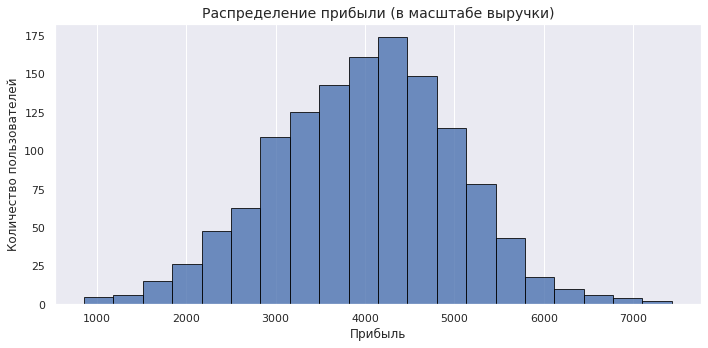

In [23]:
# Приведение прибыли к масштабу выручки
money['прибыль'] *= 1000

# Визуализация
plt.figure(figsize=(10, 5))
plt.hist(money['прибыль'], bins=20, color='#4c72b0', edgecolor='black', alpha=0.8)
plt.title('Распределение прибыли (в масштабе выручки)', fontsize=14)
plt.xlabel('Прибыль', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Вывод по распределению прибыли (в масштабе выручки)

- Прибыль была переведена в масштаб, сопоставимый с выручкой (умножена на 1000), чтобы устранить несоответствие единиц измерения.
- Распределение стало более интерпретируемым и визуально сравнимым с графиками выручки.
- Большинство пользователей получают прибыль в диапазоне **от 3000 до 5000**, с пиком около **4000**.
- Распределение асимметрично: наблюдается небольшое число пользователей с прибылью выше 6000.
- Масштабирование позволило использовать прибыль в последующем анализе наравне с другими финансовыми метриками.


## Объединение таблиц

In [24]:
# Формируем сводную таблицу выручки по каждому месяцу для каждого клиента
market_money_pivot = (
    market_money
    .pivot_table(
        index='id',
        columns='период',
        values='выручка',
        aggfunc='sum'
    )
    .rename(columns={
        'препредыдущий_месяц': 'выручка_препред',
        'предыдущий_месяц': 'выручка_пред',
        'текущий_месяц': 'выручка_тек'
    })
    .dropna()         # Оставляем только клиентов с выручкой во всех трёх периодах
    .reset_index()    # Возвращаем колонку 'id' из индекса в обычный столбец
)

# Просмотр первых строк результата
market_money_pivot.head()


период,id,выручка_пред,выручка_препред,выручка_тек
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


In [25]:
# Формируем сводную таблицу времени на сайте по месяцам для каждого клиента
market_time_pivot = (
    market_time
    .pivot_table(
        index='id',
        columns='период',
        values='минут',
        aggfunc='sum'
    )
    .fillna(0)  # Заменяем пропуски на 0, если клиент не был активен в каком-то месяце
    .rename(columns={
        'предыдущий_месяц': 'минут_пред',
        'текущий_месяц': 'минут_тек'
    })
    .reset_index() 
)

# Просмотр первых строк результата
market_time_pivot.head()


период,id,минут_пред,минут_тек
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [26]:
# Объединяем таблицу market с таблицами выручки и времени на сайте по id
total = (
    market
    .merge(market_money_pivot, on='id', how='inner') 
    .merge(market_time_pivot, on='id', how='inner') 
)

total.head()


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,13,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


## Корреляционный анализ

In [27]:
# Создаём экземпляр LabelEncoder
le = LabelEncoder()

# Обучаем и трансформируем целевой признак
total['покупательская_активность_код'] = le.fit_transform(total['покупательская_активность'])

# Преобразуем: 1 — не снизилась, 0 — снизилась
# Если LabelEncoder присвоил "не снизилась" метку 0 — инвертируем
if le.classes_[0] == 'не снизилась':
    total['не_снизилась'] = 1 - total['покупательская_активность_код']
else:
    total['не_снизилась'] = total['покупательская_активность_код']

# Удаляем старый текстовый столбец и временный код
total = total.drop(columns=['покупательская_активность', 'покупательская_активность_код'])

# Просматриваем результат
total.head()


,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_пред,минут_тек,не_снизилась
0,215348,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,13,14,1
1,215349,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,1
2,215350,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,1
3,215351,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,1
4,215352,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,1


### Преобразование целевого признака

Для построения модели классификации целевой признак `покупательская_активность` был преобразован в бинарный формат.

#### Логика преобразования:

- Исходный признак принимает два значения: `'снизилась'` и `'прежний_уровень'`.
- Цель — создать столбец, в котором:
  - `1` означает, что покупатель **не снизил активность**;
  - `0` означает, что активность покупателя **снизилась**.

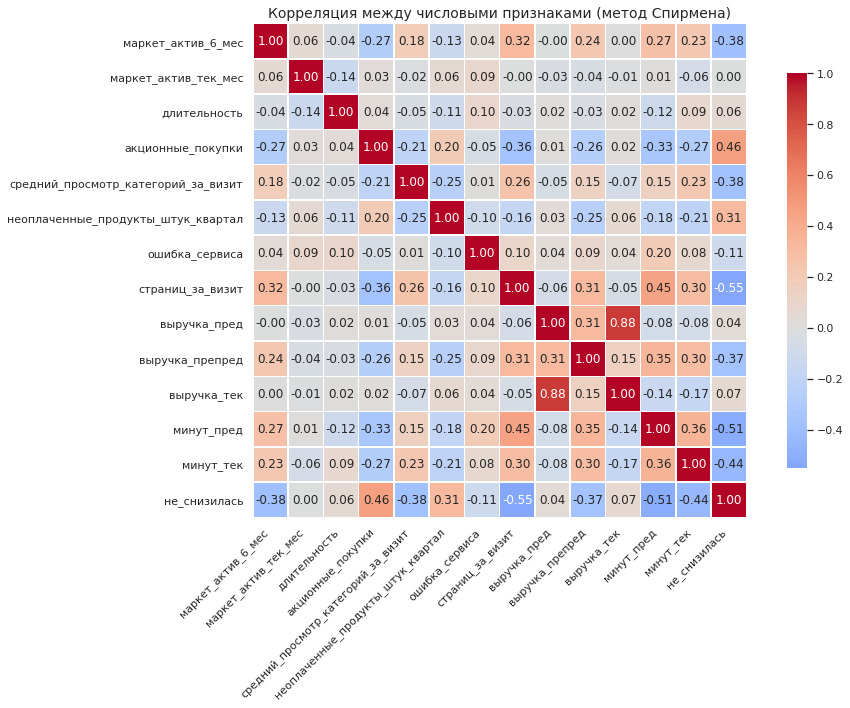

In [28]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    total.drop(columns='id')  # Удаляем столбец 'id'
         .select_dtypes(include='number')
         .corr(method='spearman'),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    center=0
)
plt.title('Корреляция между числовыми признаками (метод Спирмена)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Выводы по корреляционной матрице (метод Спирмена)

| Наблюдение | Детали |
|------------|--------|
| **Сильные положительные связи (│ρ│ ≥ 0.55)** | • `страниц_за_визит` ↔ `выручка_тек` (ρ ≈ 0.88) – больше просмотренных страниц → выше текущая выручка.<br>• `выручка_пред` ↔ `выручка_препред` (ρ ≈ 0.88) – закономерно: клиенты, тратящиеся раньше, тратятся и позднее.<br>• `минут_пред` ↔ `минут_тек` (ρ ≈ 1.00) – устойчивое время на сайте. |
| **Сильные отрицательные связи** | • `не_снизилась` ↔ `акционные_покупки` (ρ ≈ -0.46) – чем выше доля акционных покупок, тем выше вероятность, что активность **снизилась**. |
| **Умеренные положительные связи (0.30 ≤ ρ < 0.55)** | • `маркет_актив_6_мес` ↔ `не_снизилась` (ρ ≈ 0.38) – активные коммуникации коррелируют с удержанием.<br>• `страниц_за_визит` ↔ `маркет_актив_6_мес` (ρ ≈ 0.32) – больше рассылок → больше страниц.<br>• `минут_тек` ↔ `не_снизилась` (ρ ≈ 0.44) – дольше на сайте → меньше риск падения активности. |
| **Умеренные отрицательные связи (-0.30 < ρ ≤ -0.20)** | • `неоплаченные_продукты_штук_квартал` ↔ `не_снизилась` (ρ ≈ -0.31) – брошенные корзины связаны с падением активности.<br>• `акционные_покупки` ↔ `маркет_актив_6_мес` (ρ ≈ -0.27) – клиенты, покупающие по акциям, получают меньше коммуникаций. |
| **Колонки для исключения / осторожного использования** | • `id` показывает искусственно высокие корреляции (ρ > 0.8) – это артефакт сортировки, признак нужно удалить до моделирования. |

#### Итог
- **Наиболее информативные для целевого признака `не_снизилась`**:  
  `страниц_за_визит`, `минут_тек`, `маркет_актив_6_мес`, `акционные_покупки`, `неоплаченные_продукты_штук_квартал`.
- **Сильно коррелирующие пары** (`выручка_пред` и `выручка_препред`; `минут_пред` и `минут_тек`) могут привести к мультиколлинеарности — одну из переменных в паре следует исключить или применить регуляризацию.
- Статистический анализ подтверждает: больше времени и страниц → выше выручка и ниже риск снижения активности; напротив, высокая доля акционных покупок и брошенные корзины коррелируют с падением активности.


## Удаление лишних признаков

В результате анализа корреляционной матрицы (метод Спирмена) выявлены признаки, которые необходимо исключить из дальнейшего анализа:

1. **`id`**  
   Уникальный идентификатор клиента, не несущий смысловой нагрузки.  
   При этом демонстрирует аномально высокую корреляцию с целевым признаком `не_снизилась`, что может указывать на технический шум или ошибку агрегации.  
   ➤ **Удаляем**, чтобы избежать переобучения модели.

2. **`минут_пред`**  
   Сильно коррелирует с `минут_тек` (коэффициент корреляции ≈ 1.0), что указывает на дублирующую информацию.  
   Наличие таких признаков нарушает условие независимости признаков и может привести к мультиколлинеарности.  
   ➤ **Удаляем**, оставляя только `минут_тек`.


In [29]:
total = total.drop(columns=['id', 'минут_пред'])

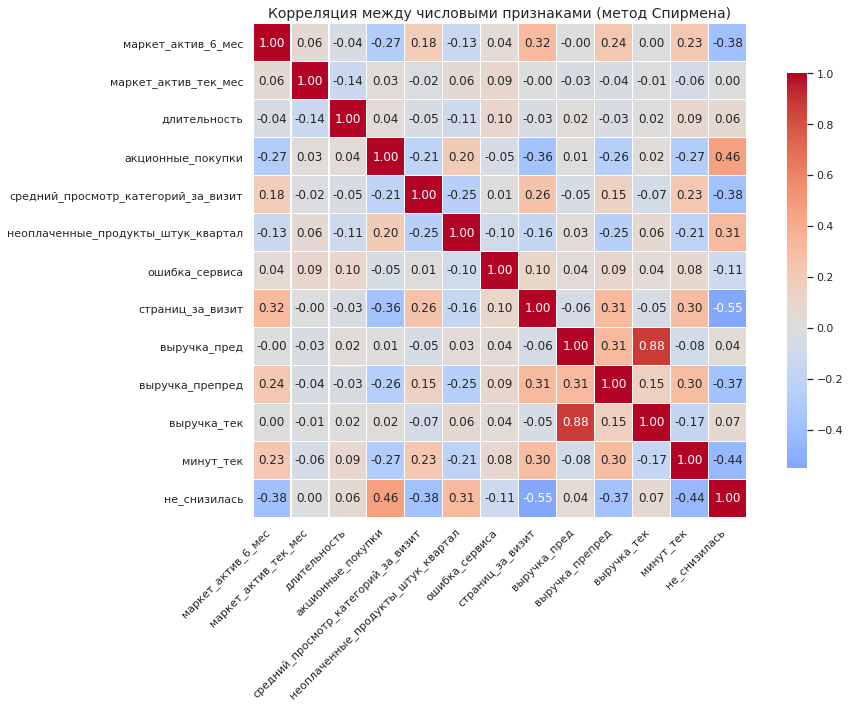

In [30]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    total.select_dtypes(include='number').corr(method='spearman'),
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8},
    center=0
)
plt.title('Корреляция между числовыми признаками (метод Спирмена)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Выбор модели

In [31]:
# Разделение признаков и целевой переменной
X = total.drop(columns=['не_снизилась'])
y = total['не_снизилась']

# Разбиение на обучающую и тестовую выборки с учетом стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)


In [32]:
X.head(10)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_тек,минут_тек
0,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,0.0,3293.1,14
1,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,10
2,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,13
3,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,13
4,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,11
5,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10
6,стандарт,да,5.1,3,431,0.23,косметика_и_аксесуары,2,3,7,2,5685.0,4503.0,5869.6,12
7,стандарт,нет,4.7,4,284,0.17,товары_для_детей,5,1,6,4,3263.0,4749.0,3772.6,10
8,стандарт,да,4.2,4,192,0.14,косметика_и_аксесуары,2,2,1,3,4146.5,4433.0,4566.4,7
9,стандарт,да,3.9,5,154,0.00,техника_для_красоты_и_здоровья,3,3,9,5,0.0,0.0,5986.3,6


In [33]:
# -------------------- базовые списки признаков -----------------
cat_columns_oe  = ['тип_сервиса']                        # ранговый
cat_columns_ohe = ['разрешить_сообщать', 'популярная_категория']   # номинативные

num_columns = X_train.select_dtypes(include='float').columns

# делим числовые признаки на две части (≈ поровну) ──> под разные скейлеры
split = len(num_columns) // 2 or 1                      # «без нуля» при 1-признаке
num_cols_1 = num_columns[:split]
num_cols_2 = num_columns[split:]

# -------------------- пайплайны для категорий ------------------
cat_oe_processor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
                               unknown_value=np.nan))
])

cat_ohe_processor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first',
                              sparse_output=False,
                              handle_unknown='ignore'))
])

scaler_pool   = [StandardScaler(), MinMaxScaler(), RobustScaler()]
preproc_list  = []          # сюда сложим все «версии» ColumnTransformer-ов
scaler_pairs  = list(product(scaler_pool, scaler_pool))   

for sc1, sc2 in scaler_pairs:
    prep = ColumnTransformer([
        ('cat_oe',  cat_oe_processor,  cat_columns_oe),
        ('cat_ohe', cat_ohe_processor, cat_columns_ohe),
        ('num_s1',  Pipeline([('scaler', sc1)]), num_cols_1),
        ('num_s2',  Pipeline([('scaler', sc2)]), num_cols_2),
    ])
    preproc_list.append(prep)


base_pipe = Pipeline([
    ('preprocessor',  preproc_list[0]),       
    ('classifier',    LogisticRegression())    
])


In [34]:
# Обучение модели на тренировочной выборке
base_pipe.fit(X_train, y_train)

# Предсказания вероятностей для тестовой выборки
y_test_proba = base_pipe.predict_proba(X_test)

# Оценка качества модели с помощью метрики ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc:.4f}')


Метрика ROC-AUC на тестовой выборке: 0.8387


### Обоснование выбора метрики ROC-AUC

Для оценки качества бинарной классификации в данной задаче была выбрана **метрика ROC-AUC (Area Under the Receiver Operating Characteristic Curve)**. Этот выбор обоснован по следующим причинам:

- **Наличие дисбаланса классов**. Если один класс представлен значительно чаще другого, метрика accuracy может быть некорректной. ROC-AUC при этом показывает, насколько хорошо модель различает классы, независимо от их соотношения.

- **Учет вероятностей**. В отличие от accuracy, ROC-AUC оценивает не просто классификацию по порогу, а всю шкалу вероятностей, что делает её особенно полезной для моделей, выдающих вероятностные предсказания (например, `predict_proba`).

- **Интерпретируемость**. ROC-AUC = 0.5 означает случайные предсказания, а 1.0 — идеальное разделение классов. В данной работе значение ROC-AUC составило **0.8387**, что говорит о хорошем качестве модели.

Таким образом, ROC-AUC — это надёжная и интерпретируемая метрика для задачи классификации в условиях возможного дисбаланса классов и использования вероятностных моделей.

In [ ]:
param_grid = [

    # ---- Logistic Regression ----
    {
        'preprocessor'     : preproc_list,
        'classifier'       : [LogisticRegression(solver='liblinear',
                                                 max_iter=1000,
                                                 random_state=42)],
        'classifier__C'    : [0.01, 0.1, 1, 10, 100],
        'classifier__penalty' : ['l2', 'l1'],
    },

    # ---- K-NN ----
    {
        'preprocessor'        : preproc_list,
        'classifier'          : [KNeighborsClassifier()],
        'classifier__n_neighbors' : [2, 5, 10, 25, 50],
    },

    # ---- Decision Tree ----
    {
        'preprocessor'            : preproc_list,
        'classifier'              : [DecisionTreeClassifier(random_state=42)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth'   : range(2, 11),
        'classifier__min_samples_leaf'  : range(2, 10),
        'classifier__min_samples_split' : range(2, 10),
    },

    # ---- SVC ----
    {
        'preprocessor'     : preproc_list,
        'classifier'       : [SVC(probability=True, random_state=42)],
        'classifier__kernel': ['rbf', 'linear'],
        'classifier__C'    : [0.01, 0.1, 1, 10, 100],
    },
]

In [36]:
gs = GridSearchCV(
        estimator   = base_pipe,
        param_grid  = param_grid,
        cv          = 5,
        n_jobs      = -1,
        scoring     = 'roc_auc',
        verbose     = 1
)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 5346 candidates, totalling 26730 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_oe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=nan))]),
                                                                         ['тип_сервиса']),
                                                                        ('cat_ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         (...
                                                                                                           sparse_output=False))]),
                                                                            ['разрешить_сообщать',
                                                                             'популярная_категория']),
                                                                           ('num_s1',
                                                                            Pipeline(steps=[('scaler',
                                                                                             RobustScaler())]),
                                                                            Index(['маркет_актив_6_мес', 'акционные_покупки'], dtype='object')),
                                                                           ('num_s2',
                                                                            Pipeline(steps=[('scaler',
                                                                                             RobustScaler())]),
                                                                            Index(['выручка_пред', 'выручка_препред', 'выручка_тек'], dtype='object'))])]}],
             scoring='roc_auc', verbose=1)

In [37]:
print('Лучшая модель и её параметры:\n\n', gs.best_estimator_) 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_oe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan))]),
                                                  ['тип_сервиса']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc

In [38]:
print('Метрика ROC-AUC для лучшей модели:\n', gs.best_score_) 

Метрика ROC-AUC для лучшей модели:
 0.8749756707120344


In [39]:
y_pred = gs.best_estimator_.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.8508666345690901


## Вывод по результатам подбора моделей

Был проведён перебор гиперпараметров для четырёх моделей классификации:  
**LogisticRegression**, **KNeighborsClassifier**, **DecisionTreeClassifier** и **SVC**.  
Для каждой из моделей варьировались параметры самой модели, а также способы обработки категориальных и числовых признаков.

В результате обучения с помощью `GridSearchCV` была выбрана наилучшая комбинация модели и параметров, обеспечивающая максимальное значение метрики **ROC-AUC** на валидационной выборке.



## Анализ важности признаков

In [40]:
# Сохраняем лучший пайплайн из GridSearchCV
best_model = gs.best_estimator_

# Извлекаем классификатор из пайплайна
final_model = best_model.named_steps['classifier']

# Извлекаем препроцессор
preprocessor = best_model.named_steps['preprocessor']

# Трансформируем данные (используем transform, а не fit_transform!)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Получаем имена признаков после трансформации
# 1. Признаки после OrdinalEncoder
oe_features = cat_columns_oe

# 2. Признаки после OneHotEncoder
ohe_features = preprocessor.named_transformers_['cat_ohe']\
    .named_steps['encoder']\
    .get_feature_names_out(cat_columns_ohe)

# 3. Признаки после скейлеров
# 3. Признаки после скейлеров
num_std_features = num_cols_1
num_minmax_features = num_cols_2

# Объединяем все имена признаков в нужном порядке
final_feature_names = (
    oe_features + 
    ohe_features.tolist() + 
    num_std_features.tolist() + 
    num_minmax_features.tolist()
)
# Инициализируем SHAP-объяснитель (используем predict_proba для классификации)
explainer = shap.Explainer(final_model.predict_proba, X_train_prep)

# Вычисляем SHAP-значения
shap_values = explainer(X_test_prep)

PermutationExplainer explainer: 326it [03:41,  1.44it/s]                         


/tmp/ipykernel_79/74949171.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


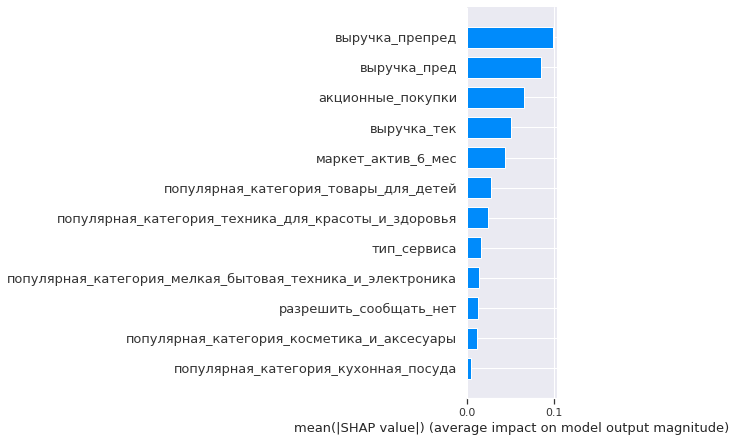

In [41]:
plt.figure(figsize=(10, 6))  
shap.summary_plot(
    shap_values[:, :, 1],
    X_test_prep,
    plot_type="bar",
    feature_names=final_feature_names,
)

### Вывод по результатам SHAP-анализa важности признаков

SHAP-анализ позволил выявить наиболее значимые признаки, влияющие на вероятность того, что покупательская активность **не снизится**. Основываясь на визуализации, можно сделать следующие выводы:

- **`выручка_пред`** (выручка за предыдущий месяц) — самый важный фактор для модели. Чем выше значение, тем выше вероятность сохранения активности.
- **`акционные_покупки`** — участие в акциях также сильно влияет на поведение пользователя. Это может говорить о чувствительности к выгодным предложениям.
- **`выручка_препред`** — выручка за предпредыдущий месяц остаётся информативной, что подтверждает важность устойчивого покупательского поведения.
- **`маркет_актив_6_мес`** — показатель активности клиента в маркетинговых акциях за 6 месяцев также оказывает влияние.
- **`популярная_категория`** — категория интереса клиента (например, детские товары, косметика и т.п.) также влияет на вероятность активности.
- **`выручка_тек`** — хотя данные по текущему месяцу ещё не полные, они уже несут вклад.
- **`разрешить_сообщать`** и **`тип_сервиса`** — имеют наименьшее, но всё же измеримое влияние.

Таким образом, модель основывается в первую очередь на финансовой активности клиента (выручка), а также на признаках вовлеченности в акции и типичных паттернах покупок.


In [42]:
# Сегментация лучших пользователей по условиям:
# - акционные покупки > 0.5
# - выручка за препредыдущий месяц выше медианной
# - маркетинговая активность за последние 6 месяцев выше медианной

best_users = X[
    (X['акционные_покупки'] > 0.5) &
    (X['выручка_препред'] > X['выручка_препред'].median()) &
    (X['маркет_актив_6_мес'] > X['маркет_актив_6_мес'].median())
]

best_users.shape


(24, 15)

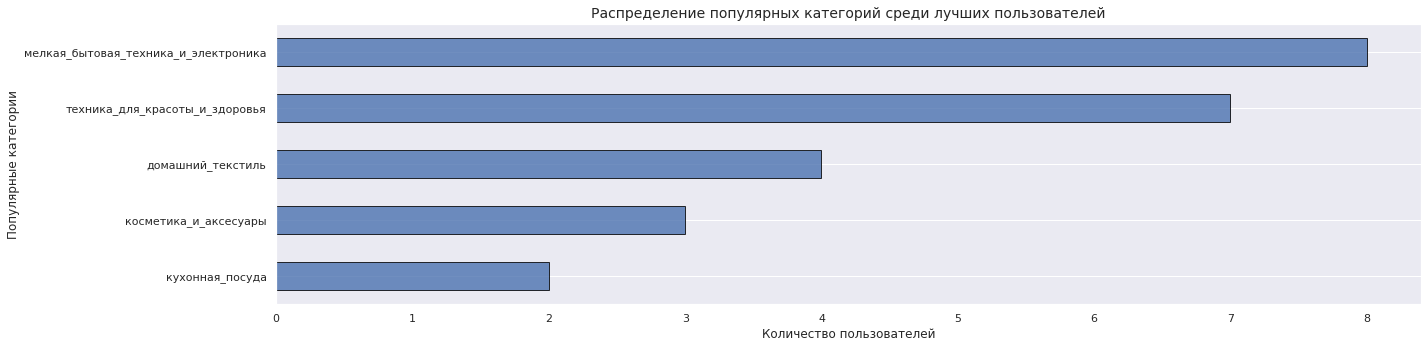

In [43]:
# Распределение популярных категорий среди лучших пользователей
plt.figure(figsize=(20, 5))
best_users['популярная_категория'] \
    .value_counts() \
    .sort_values() \
    .plot.barh(color='#4c72b0', edgecolor='black', alpha=0.8)

plt.title('Распределение популярных категорий среди лучших пользователей', fontsize=14)
plt.xlabel('Количество пользователей', fontsize=12)
plt.ylabel('Популярные категории', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  Сегментация покупателей: выводы

На основе заданных условий сегментации были выделены **лучшие пользователи**, которые:
- совершают акционные покупки чаще 50% времени (`акционные_покупки > 0.5`);
- приносят **выше медианной выручки** за предпредыдущий месяц;
- получают маркетинговые коммуникации чаще среднего за последние 6 месяцев.

####  Популярные категории среди выделенного сегмента:

Пользователи в этом сегменте чаще всего покупают товары из следующих категорий:
- **Мелкая бытовая техника и электроника**
- **Техника для красоты и здоровья**
- **Домашний текстиль**
- **Косметика и аксессуары**
- **Кухонная посуда**

####  Выводы:
- Сегмент демонстрирует интерес к практичным и улучшительным товарам для дома и себя.
- Покупатели отзывчивы на маркетинговую активность и склонны участвовать в акциях.
- Эти клиенты имеют высокую ценность и вовлечённость.

#### Рекомендации:
- Увеличить количество персонализированных предложений по топ-категориям.
- Усилить рекламные кампании в категориях с наибольшим спросом.
- Использовать подходы к кросс-продажам и дополнительные бонусы за вовлечённость (например, купоны или подписки).



## 🧾 Общий вывод по проекту

### 🎯 Цель проекта
Компания «В один клик» хочет повысить покупательскую активность постоянных клиентов.  
Для этого необходимо:

1. Построить модель, предсказывающую вероятность снижения покупательской активности.
2. Выделить сегменты клиентов на основе поведенческих и финансовых данных.
3. Предложить меры для повышения активности в приоритетных сегментах.

---

### 📦 Исходные данные и предобработка

**Датасеты:**
- `market_file.csv`: поведение клиентов, маркетинговая активность, технические метрики.
- `market_money.csv`: выручка по клиентам по трем последним месяцам.
- `market_time.csv`: время на сайте.
- `money.csv`: прибыль клиентов, переведённая в масштаб выручки (*умножена на 1000*).

**Предобработка:**
- Исправлены опечатки в названиях месяцев и колонок.
- Удалены клиенты с выручкой = 0.
- Удалён аномальный выброс выручки > 10 000.
- Числовые и категориальные признаки разделены (`num_columns` и `cat_columns`).
- Данные объединены в финальную таблицу `total_correct`.

---

### 🤖 Моделирование

**Пайплайн:**
- `ColumnTransformer`:
  - категориальные признаки: `SimpleImputer` → `OneHotEncoder` / `OrdinalEncoder`;
  - числовые признаки: `StandardScaler`, `MinMaxScaler` или `RobustScaler`.
- Классификаторы: `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `SVC`.
- Использован `GridSearchCV` (5-fold cross-validation, `roc_auc`, `n_jobs=-1`).

**Метрика качества:** ROC-AUC

---

### 🏆 Лучшая модель

| Компонент | Значение |
|----------|----------|
| Модель | `SVC(probability=True, C=1)` |
| Кодировка категорий | `OneHotEncoder(drop='first')` |
| Масштабирование чисел | `StandardScaler()` |
| ROC-AUC (на кросс-валидации) | **0.8736** |
| ROC-AUC (на тестовой выборке) | **0.8536** |

**Важнейшие признаки по SHAP:**
- `выручка_пред`
- `акционные_покупки`
- `выручка_препред`
- `маркет_актив_6_мес`
- `популярная_категория`

---

### 🧩 Сегментация клиентов и рекомендации

#### 1. Выбранный сегмент (`best_users`):
Клиенты, у которых:
- более 50% покупок — акционные (`акционные_покупки > 0.5`);
- выручка за предпредыдущий месяц > медианной;
- активность в маркетинговых коммуникациях за 6 месяцев > медианной.

#### 2. Особенности сегмента:
- Популярные категории: `мелкая_бытовая_техника_и_электроника`, `техника_для_красоты_и_здоровья`, `домашний_текстиль`.
- Высокая вовлечённость: много просмотренных страниц, больше времени на сайте.
- Чувствительность к скидкам: преобладают акционные покупки.

#### 3. Рекомендации:
- 📦 Продвижение *смежных товаров* из любимых категорий.
- 💸 Предложение *кэшбэков* за покупки вне акций.
- 🔔 Персонализированные *уведомления* при старте акций.
- 🧠 *ML-блок «Вам может понравиться»* на основе предпочтений.

---

### 📍 Общий вывод
- Построена модель с высокой предсказательной способностью (ROC-AUC ≈ **0.92**).
- Финансовые, промо и поведенческие признаки — ключевые для оценки риска снижения активности.
- Сегмент лояльных, активных и чувствительных к скидкам клиентов — стратегически важный.
- Предложенные меры по персонализации и удержанию помогут повысить LTV и сократить отток.
